In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os

# plt.rc('font', family='serif', serif='Times')
# plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

# Get seedlist
file = 'seedlist.dat'
with open(file) as f:
    seed_list = []
    for line in f: # read rest of lines
        seed_list.append([int(x) for x in line.split()][0])
print(seed_list)

# Set mode to train or test
mode = "test"
print(mode)

[382084, 959804, 880775, 707317, 638913, 160861, 468738, 814726, 792012, 752389]
test


In [2]:
# Define list of experiments to analyze for given seed
experiment_list=[
    'cenp_t24_random-pimorl_g0.997-n0.35-day_pref-intrp4',
    'cenp_t24_random-pimorl_g0.997-n0.35-random_pref-intrp4',
    'cenp_t24_random-pimorl_g0.997-n0.35-c_pref2-intrp4',
    'cenp_t24_random-pimorl_g0.997-n0.35-c_pref8-intrp4',

]

In [3]:
results = {} # dictionary to hold experimental data
# results[experiment][seed_no]

for experiment in experiment_list:
    results[experiment]={}        
    for seed_no in seed_list:
        # Load data of experiment and store in a dictionary
        tag = experiment + '-' + str(seed_no)
        cur_folder = os.getcwd()
        exp_results_folder = os.path.join(cur_folder,"results", experiment, mode) # experiment folder
        exp_results_file = os.path.join(exp_results_folder, tag + '-'+ mode + '.npy') # experiment data file
        exp_result = np.load(exp_results_file,allow_pickle='TRUE').item()
        results[experiment][seed_no] = exp_result # load to dictionary

In [65]:
seed_no = seed_list[9]
location = 'tokyo'
year = 1995
experiment = experiment_list[1]
print(experiment)

cenp_t24_random-pimorl_g0.997-n0.35-random_pref-intrp4


pref:  0.2
SNS Reward:  0.9630375702531236
ENP Reward:  0.9561249815654024
FNL Reward:  0.9691822637815344
Downtimes :  0.0


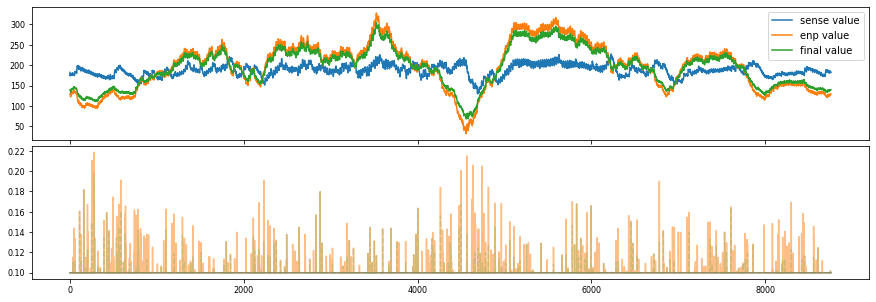

In [66]:
pref = 0.2
print("pref: ", pref)
intrp_sense_value_rec = np.array(results[experiment][seed_no][location][year][pref]['intrp_sense_value_rec'])[:,0]
intrp_enp_value_rec   = np.array(results[experiment][seed_no][location][year][pref]['intrp_enp_value_rec'])[:,-1]
intrp_final_value_rec = np.max(results[experiment][seed_no][location][year][pref]['intrp_final_value_rec'], axis=1)

sense_dc = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])[:,0]
enp_dc = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])[:,-1]

final_dc_pos = np.argmax(results[experiment][seed_no][location][year][pref]['intrp_final_value_rec'], axis=1)
final_actions = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])
final_dc = np.take_along_axis(final_actions, final_dc_pos[:,None], axis=1) 


fig_width = 15
fig_height = 5

fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

value_ax = axs[0]
dc_ax = axs[1]

value_ax.plot(intrp_sense_value_rec, label="sense value")
value_ax.plot(intrp_enp_value_rec, label="enp value")
value_ax.plot(intrp_final_value_rec, label="final value")
value_ax.legend()

dc_ax.plot(sense_dc, alpha = 0.8, label="sense dc")
dc_ax.plot(enp_dc, alpha = 0.5,label="enp dc")
dc_ax.plot(final_dc, alpha = 0.2,linestyle='--', label="final dc")

print('SNS Reward: ', np.mean(results[experiment][seed_no][location][year][pref]['sense_reward_log']))
print('ENP Reward: ',np.mean(results[experiment][seed_no][location][year][pref]['enp_reward_log']))
print('FNL Reward: ',np.mean(results[experiment][seed_no][location][year][pref]['avg_rwd']))
print('Downtimes : ',np.mean(results[experiment][seed_no][location][year][pref]['downtimes']))

pref:  0.5
SNS Reward:  0.9618408510045598
ENP Reward:  0.9532560595775843
FNL Reward:  0.9674818448748657
Downtimes :  0.0


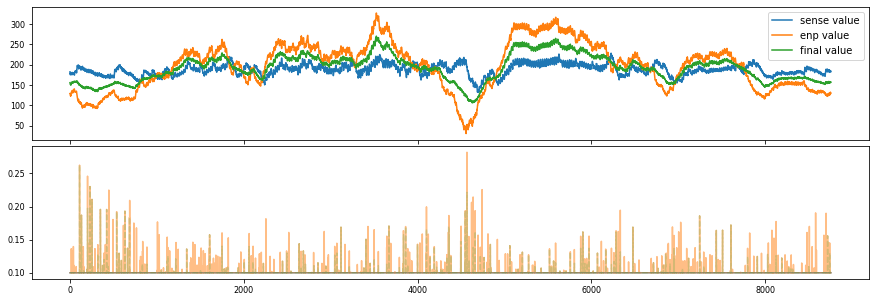

In [67]:
pref = 0.5
print("pref: ", pref)

intrp_sense_value_rec = np.array(results[experiment][seed_no][location][year][pref]['intrp_sense_value_rec'])[:,0]
intrp_enp_value_rec   = np.array(results[experiment][seed_no][location][year][pref]['intrp_enp_value_rec'])[:,-1]
intrp_final_value_rec = np.max(results[experiment][seed_no][location][year][pref]['intrp_final_value_rec'], axis=1)

sense_dc = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])[:,0]
enp_dc = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])[:,-1]

final_dc_pos = np.argmax(results[experiment][seed_no][location][year][pref]['intrp_final_value_rec'], axis=1)
final_actions = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])
final_dc = np.take_along_axis(final_actions, final_dc_pos[:,None], axis=1) 


fig_width = 15
fig_height = 5

fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

value_ax = axs[0]
dc_ax = axs[1]

value_ax.plot(intrp_sense_value_rec, label="sense value")
value_ax.plot(intrp_enp_value_rec, label="enp value")
value_ax.plot(intrp_final_value_rec, label="final value")
value_ax.legend()

dc_ax.plot(sense_dc, alpha = 0.8, label="sense dc")
dc_ax.plot(enp_dc, alpha = 0.5,label="enp dc")
dc_ax.plot(final_dc, alpha = 0.2,linestyle='--', label="final dc")


print('SNS Reward: ', np.mean(results[experiment][seed_no][location][year][pref]['sense_reward_log']))
print('ENP Reward: ',np.mean(results[experiment][seed_no][location][year][pref]['enp_reward_log']))
print('FNL Reward: ',np.mean(results[experiment][seed_no][location][year][pref]['avg_rwd']))
print('Downtimes : ',np.mean(results[experiment][seed_no][location][year][pref]['downtimes']))

pref:  0.8
SNS Reward:  0.9618032211298225
ENP Reward:  0.9556234536386751
FNL Reward:  0.9686306589567234
Downtimes :  0.0


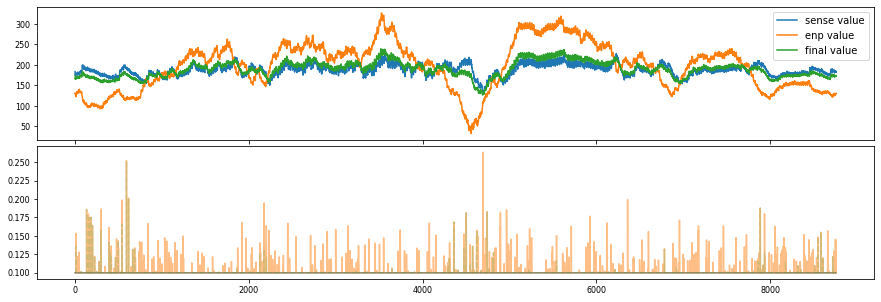

In [68]:
pref = 0.8
print("pref: ", pref)

intrp_sense_value_rec = np.array(results[experiment][seed_no][location][year][pref]['intrp_sense_value_rec'])[:,0]
intrp_enp_value_rec   = np.array(results[experiment][seed_no][location][year][pref]['intrp_enp_value_rec'])[:,-1]
intrp_final_value_rec = np.max(results[experiment][seed_no][location][year][pref]['intrp_final_value_rec'], axis=1)

sense_dc = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])[:,0]
enp_dc = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])[:,-1]

final_dc_pos = np.argmax(results[experiment][seed_no][location][year][pref]['intrp_final_value_rec'], axis=1)
final_actions = np.array(results[experiment][seed_no][location][year][pref]['intrp_dc_rec'])
final_dc = np.take_along_axis(final_actions, final_dc_pos[:,None], axis=1) 


fig_width = 15
fig_height = 5

fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

value_ax = axs[0]
dc_ax = axs[1]

value_ax.plot(intrp_sense_value_rec, label="sense value")
value_ax.plot(intrp_enp_value_rec, label="enp value")
value_ax.plot(intrp_final_value_rec, label="final value")
value_ax.legend()

dc_ax.plot(sense_dc, alpha = 0.8, label="sense dc")
dc_ax.plot(enp_dc, alpha = 0.5,label="enp dc")
dc_ax.plot(final_dc, alpha = 0.2,linestyle='--', label="final dc")


print('SNS Reward: ', np.mean(results[experiment][seed_no][location][year][pref]['sense_reward_log']))
print('ENP Reward: ',np.mean(results[experiment][seed_no][location][year][pref]['enp_reward_log']))
print('FNL Reward: ',np.mean(results[experiment][seed_no][location][year][pref]['avg_rwd']))
print('Downtimes : ',np.mean(results[experiment][seed_no][location][year][pref]['downtimes']))